In [123]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import lux
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import pandas.util.testing as tm

In [124]:
#Read the data
data=pd.read_csv("D:\\Machine Learning\\Research Work\\IoT intrusion detection\\BOT IOT Dataset\\Training and Test Dataset\\DDOS_TCP_sample.csv")

In [125]:
#Making a copy of data
data=data.copy()

#Feature Engineering

1. Understanding Data

In [126]:
#checking the missing values
data.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64


In [127]:
data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pkSeqID            1118 non-null   int64  
 1   proto              1118 non-null   object 
 2   saddr              1118 non-null   object 
 3   sport              1118 non-null   int64  
 4   daddr              1118 non-null   object 
 5   dport              1118 non-null   int64  
 6   seq                1118 non-null   int64  
 7   stddev             1118 non-null   float64
 8   N_IN_Conn_P_SrcIP  1118 non-null   int64  
 9   min                1118 non-null   float64
 10  state_number       1118 non-null   int64  
 11  mean               1118 non-null   float64
 12  N_IN_Conn_P_DstIP  1118 non-null   int64  
 13  drate              1118 non-null   float64
 14  srate              1118 non-null   float64
 15  max                1118 non-null   float64
 16  attack             1118 

In [128]:
data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,2091285,tcp,192.168.100.147,56989,192.168.100.3,80,177891,1.700579,27,0.000000,3,2.404854,100,0.000000,0.292426,3.628808,1,DDoS,TCP
1,2385158,tcp,192.168.100.147,30039,192.168.100.3,80,209618,1.427860,83,0.000000,3,2.018568,100,0.000000,0.327818,3.074911,1,DDoS,TCP
2,2262267,tcp,192.168.100.148,64884,192.168.100.3,80,86726,0.120417,84,3.179468,1,3.306811,100,0.314518,0.453465,3.468401,1,DDoS,TCP
3,1717265,tcp,192.168.100.150,13165,192.168.100.3,80,66024,0.000000,100,0.000000,3,0.000000,100,0.000000,0.085210,0.000000,1,DDoS,TCP
4,1793253,tcp,192.168.100.150,31261,192.168.100.3,80,142012,0.000000,81,0.242885,1,0.242885,100,0.000000,4.117175,0.242885,1,DDoS,TCP


In [129]:
data['proto'].unique()

array(['tcp', 'udp', 'arp', 'ipv6-icmp'], dtype=object)

In [130]:
data['saddr'].unique()

array(['192.168.100.147', '192.168.100.148', '192.168.100.150',
       '192.168.100.149', '192.168.100.3', '192.168.100.5',
       '192.168.100.27', 'fe80::250:56ff:febe:254',
       'fe80::250:56ff:febe:e9d9', '192.168.100.46',
       'fe80::250:56ff:febe:26db', '192.168.100.1', '192.168.100.6',
       'fe80::250:56ff:febe:89ee', '192.168.100.4', '192.168.100.7'],
      dtype=object)

In [131]:
data['daddr'].unique()

array(['192.168.100.3', '192.168.100.150', '192.168.100.148',
       '192.168.217.2', '192.168.100.55', '255.255.255.255', '96.7.49.66',
       '205.251.197.206', '192.168.100.1', '205.251.194.201',
       '224.0.0.251', '205.251.196.32', '52.201.147.106', '192.5.5.241',
       '192.55.83.30', '192.31.80.30', '8.8.8.8', '13.55.154.73',
       'ff02::2', '192.41.162.30', '129.250.35.250', 'ff02::fb',
       '27.124.125.250', '199.19.56.1', '192.168.100.5', '192.33.14.30',
       '205.251.199.148', '192.58.128.30', '192.12.94.30',
       '205.251.196.160', '205.251.199.194', '192.36.148.17',
       '184.85.248.65', '192.33.4.12', '52.11.124.117', '192.168.100.255',
       '192.54.112.30', 'ff02::1', '172.217.25.170', '205.251.194.102',
       '192.112.36.4', '192.168.100.7', '205.251.194.86',
       '192.168.100.27', '192.52.178.30', '205.251.195.59', '52.35.35.13'],
      dtype=object)

In [132]:
data.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [133]:
#Removing the unwanted coloumns
col=['saddr','daddr','category','subcategory']
data=data.drop(columns=col,axis=1)

In [134]:
#Removing the dublicate values
data.drop_duplicates(keep='first',inplace=True)

2. Exploratory Data Analysis

In [135]:
data.head()

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
0,2091285,tcp,56989,80,177891,1.700579,27,0.000000,3,2.404854,100,0.000000,0.292426,3.628808,1
1,2385158,tcp,30039,80,209618,1.427860,83,0.000000,3,2.018568,100,0.000000,0.327818,3.074911,1
2,2262267,tcp,64884,80,86726,0.120417,84,3.179468,1,3.306811,100,0.314518,0.453465,3.468401,1
3,1717265,tcp,13165,80,66024,0.000000,100,0.000000,3,0.000000,100,0.000000,0.085210,0.000000,1
4,1793253,tcp,31261,80,142012,0.000000,81,0.242885,1,0.242885,100,0.000000,4.117175,0.242885,1


In [136]:
#Frequency of each category
data['proto'].value_counts()

tcp          1013
udp            92
arp            10
ipv6-icmp       3
dtype: int64


In [137]:
#relationship between the independent variables
data.corr()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [138]:
#Cross tables and data visualization
#Extracting the coloumn names
data.columns

Index(['pkSeqID', 'proto', 'sport', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'attack'],
      dtype='object')

In [139]:
#proto proportion table
pd.crosstab(index=data['proto'],columns='count',normalize=True)

col_0,count
proto,
arp,0.008945
ipv6-icmp,0.002683
tcp,0.906082
udp,0.082290


In [140]:
#proto vs attack
pd.crosstab(index=data['proto'],columns=data['attack'],normalize=True)

attack,0,1
proto,,
arp,0.008945,0.000000
ipv6-icmp,0.002683,0.000000
tcp,0.011628,0.894454
udp,0.082290,0.000000


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

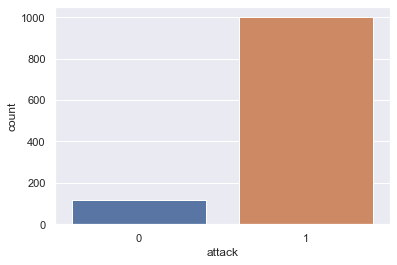

In [141]:
#frequency distribution of attack
sns.countplot(data['attack'])

In [142]:

data=data.drop(columns='pkSeqID')

In [143]:
#Categorical Encoding
data=pd.get_dummies(data)

In [144]:
data.head()

,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,proto_arp,proto_ipv6-icmp,proto_tcp,proto_udp
0,56989,80,177891,1.700579,27,0.000000,3,2.404854,100,0.000000,0.292426,3.628808,1,0,0,1,0
1,30039,80,209618,1.427860,83,0.000000,3,2.018568,100,0.000000,0.327818,3.074911,1,0,0,1,0
2,64884,80,86726,0.120417,84,3.179468,1,3.306811,100,0.314518,0.453465,3.468401,1,0,0,1,0
3,13165,80,66024,0.000000,100,0.000000,3,0.000000,100,0.000000,0.085210,0.000000,1,0,0,1,0
4,31261,80,142012,0.000000,81,0.242885,1,0.242885,100,0.000000,4.117175,0.242885,1,0,0,1,0


In [145]:
#Seperating the features and target variable
y=data['attack']
x=data.drop(columns='attack')

In [146]:
data.shape

(1118, 17)

#

In [147]:
x.shape

(1118, 16)

In [148]:
y.shape

(1118,)

In [149]:
#Balancing the target variable
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0)
x, y = smk.fit_sample(x,y)

In [150]:
x.shape

(1986, 16)

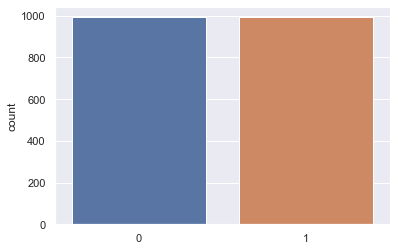

In [151]:
sns.countplot(y)

In [152]:
#Spliting dataset into Train and Test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [153]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
clf=KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [155]:
#Checking the accuracy of model
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(" Testing Accuracy: %.2f%%" % (accuracy * 100.0))
scores = cross_val_score(clf, x_train, y_train, cv=10)
print("Cross Validation Accuracy: %.2f%% " % (scores.mean()*100))

 Testing Accuracy: 99.83%
Cross Validation Accuracy: 99.78% 


Text(0.5, 1.0, 'KNN Classifier')

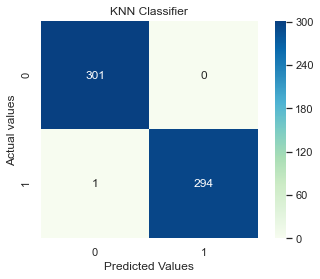

In [156]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
ax.set_title('KNN Classifier')

In [157]:
from sklearn.metrics import classification_report
print('KNN Classifier')
print(classification_report(y_test, y_pred))

KNN Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       1.00      1.00      1.00       295

    accuracy                           1.00       596
   macro avg       1.00      1.00      1.00       596
weighted avg       1.00      1.00      1.00       596



In [158]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.9983050847457627

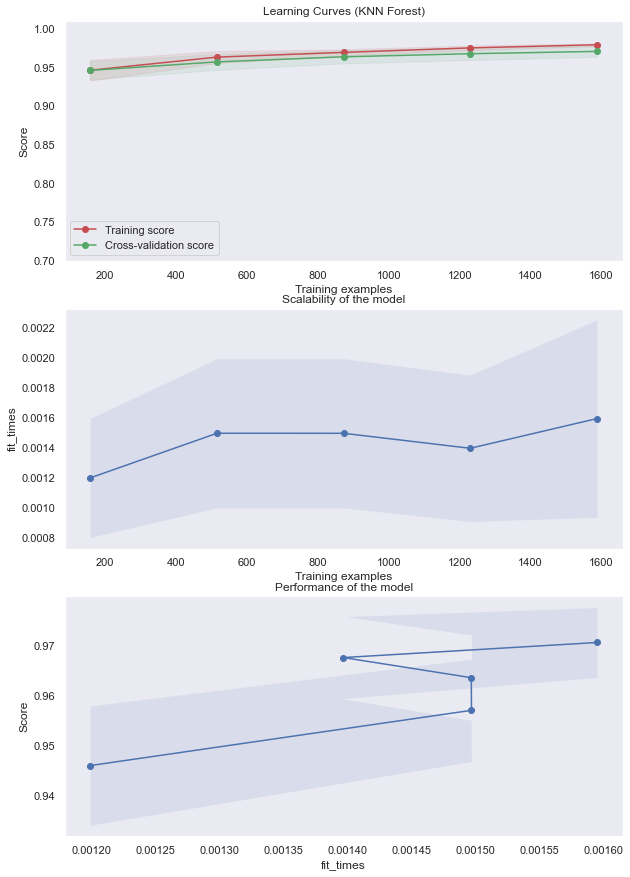

In [159]:
#from sklearn.model_selection import learning_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, x, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")


fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves (KNN Forest)"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier()
plot_learning_curve(estimator, title, x, y,axes=axes[:,], cv=cv, ylim=(0.7, 1.01), n_jobs=4)

plt.show()